In [277]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import logging
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
logging.getLogger().setLevel(logging.INFO)

In [292]:
def get_data(n):
    u = np.array([0, 5, 10])
    us = np.random.randint(0,3,n)
    return np.random.normal(u[us], 1).reshape(n,1)

5.02155651099


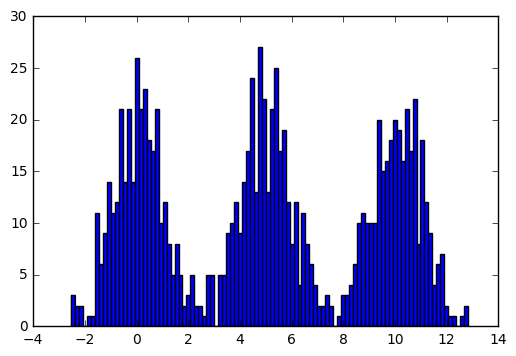

In [293]:
data = get_data(1000)
print(data.mean())
plt.hist(data, bins=100)
plt.show()

In [294]:
x = tf.placeholder(tf.float32, shape=[None, 1])
means = tf.Variable([6,3,4], dtype=tf.float32)
normals = tf.contrib.distributions.Normal(mu=means, sigma=1.0)
likelihoods = tf.reduce_mean(normals.pdf(x), reduction_indices=[1])
loglike = tf.reduce_sum(tf.log(likelihoods))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(-loglike)

In [295]:
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()
sess.run(init)
for _ in range(10000):
    sess.run(train_step, feed_dict={x:data})
ans = means.eval(sess)
print(ans)
sess.close()

[ 10.07464409   0.06355686   4.99224043]
